# Sentiment Analysis of Drug Reviews using LSTM
This notebook builds an LSTM model to classify drug reviews as either positive or negative.


## Install Dependencies
Install additional Python libraries required for executing this notebook.


In [13]:
!pip install nltk
!pip install seaborn
!pip install matplotlib
!pip install tqdm
!pip install torch torchvision
%pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import Libraries
Import all the necessary libraries for data processing, modeling, and visualization.


In [14]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter


## Download NLTK Resources
We need to download necessary NLTK data like stopwords and tokenizer.


In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from sklearn.utils import resample
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Download required NLTK data (run once)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(is_cuda)

False


## Load and Preprocess Data
Load the training and test datasets, and preprocess them by cleaning text and balancing classes.


In [18]:
def get_train_test(balance):
    cwd = os.getcwd()
    # print(cwd)

    df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')
    df_test = pd.read_csv(cwd + "\data\drugsComTest_raw.tsv", sep='\t')

    df_list = [df_train, df_test]

    # print(f"train_len={train_len} test_len={test_len} df_len={len(df)}")
    print(df_train.columns)

    df_train['drugName'] = df_train['drugName'].str.upper()
    number_of_drugs = len(df_train['drugName'].unique())
    print(f"Number of drugs = {number_of_drugs}")

    df_train['condition'] = df_train['condition'].str.upper()
    number_of_drugs = len(df_train['condition'].unique())
    print(f"Number of condition = {number_of_drugs}")

    # Generate columns for review length and positive reviews.  If the rating is greater than 7 of 10, assume it is positive
    for df in df_list:
        df['review_len'] = df['review'].str.len()
        df['is_positive'] = np.where(df['rating'] > 7, 1, 0)

    if balance:
        df_train = balance_class(df_train, 'is_positive')
        df_test = balance_class(df_test, 'is_positive')
    return df_train, df_test

def balance_class(df, colname):
    class1 = df[df[colname] == 1].copy()
    class2 = df[df[colname] == 0].copy()

    if len(class1) > len(class2):
        maj_class = class1
        min_class = class2
    else:
        maj_class = class2
        min_class = class1

    maj_downsample = resample(maj_class, replace=False, n_samples=len(min_class), random_state=0)

    df_balanced = pd.concat([min_class, maj_downsample])
    return df_balanced

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_56121/2163893732.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')
/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_56121/2163893732.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_test = pd.read_csv(cwd + "\data\drugsComTest_raw.tsv", sep='\t')


In [19]:
import os

In [20]:
import os  # Add this import
import pandas as pd
# ... your other imports ...

def get_train_test(balance):
    cwd = os.getcwd()
    df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')
    # rest of your function

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_56121/3114962087.py:7: SyntaxWarning: invalid escape sequence '\d'
  df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')


In [21]:
def get_train_test(balance):
    cwd = os.getcwd()
    data_path = os.path.join(cwd, "data", "drugsComTrain_raw.tsv")
    df_train = pd.read_csv(data_path, sep='\t')
    # rest of your function

In [22]:
import os  # Add this import
import pandas as pd
# ... your other imports ...

def get_train_test(balance):
    cwd = os.getcwd()
    df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')
    # rest of your function

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_56121/3114962087.py:7: SyntaxWarning: invalid escape sequence '\d'
  df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')


## Data Cleaning
Define functions to clean the text data by removing punctuation, digits, and other unnecessary characters.


In [24]:
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Correct paths to the train and test files
train_path = "/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTrain_raw.tsv"
test_path = "/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTest_raw.tsv"

# Load the data
def get_train_test():
    if os.path.exists(train_path) and os.path.exists(test_path):
        df_train = pd.read_csv(train_path, sep='\t')
        df_test = pd.read_csv(test_path, sep='\t')
        return df_train, df_test
    else:
        print(f"Error: Train file or test file not found in the specified path.")
        print(f"Expected Train Path: {train_path}")
        print(f"Expected Test Path: {test_path}")
        return None, None

# Load the data
df_train, df_test = get_train_test()

if df_train is not None and df_test is not None:
    print("Data loaded successfully.")
else:
    print("Data loading failed. Please check the file paths.")

# Clean text function
def clean_text(text):
    # Implementation for text cleaning
    cleaned_text = str(text).lower()
    # Add additional cleaning steps as needed
    return cleaned_text

# Create corpus from training data
if df_train is not None:
    corpus = []
    for review in df_train['review']:
        words = str(review).lower().split()
        corpus.extend(words)

    # Create a dictionary with word as key and rank as value
    oh_dict = {}
    for word_count, word in enumerate(corpus):
        oh_dict[word] = word_count + 1

    word_list_train = []
    word_list_test = []

    # Process training data
    for line in df_train['review']:
        line_tokens = []
        for word in line.split():
            if clean_text(word) in oh_dict.keys():
                line_tokens.append(oh_dict[clean_text(word)])
        word_list_train.append(line_tokens)

    # Process test data
    for line in df_test['review']:
        line_tokens = []
        for word in line.split():
            if clean_text(word) in oh_dict.keys():
                line_tokens.append(oh_dict[clean_text(word)])
        word_list_test.append(line_tokens)

    print("Processing complete.")


Data loaded successfully.
Processing complete.


In [26]:
import os
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download required NLTK data
nltk.download('stopwords')

# Update file paths
train_path = "/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTrain_raw.tsv"
test_path = "/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTest_raw.tsv"

# Load the data using the correct paths
def get_train_test():
    if os.path.exists(train_path) and os.path.exists(test_path):
        df_train = pd.read_csv(train_path, sep='\t')
        df_test = pd.read_csv(test_path, sep='\t')
        return df_train, df_test
    else:
        print("Error: Train file or test file not found in the specified path.")
        return None, None

# Get the data
df_train, df_test = get_train_test()

# Make sure data loaded successfully before continuing
if df_train is not None and df_test is not None:

    def clean_text(text):
        # Remove punctuation
        cleaned_text = re.sub(r'[^\w\s]', '', text)
        # Remove extra whitespace
        cleaned_text = re.sub(r"\s+", ' ', cleaned_text)  # Changed to keep single spaces between words
        # Remove digits
        cleaned_text = re.sub(r"\d", '', cleaned_text)
        return cleaned_text

    # Set column to lower case
    df_train['review'] = df_train['review'].str.lower()
    df_test['review'] = df_test['review'].str.lower()

    # Get stop words from NLTK
    stop_words = set(stopwords.words('english'))
    word_list = []

    # Concat all rows to single line
    all_lines = df_train['review'].str.cat(sep=' ')
    for word in all_lines.split():
        # Clean words
        word = clean_text(word)
        # If word not a stop word or removed in cleaning
        if word not in stop_words and word != '':
            # Add to list of words
            word_list.append(word)

    # Get the 10,000 most common words
    corpus = Counter(word_list).most_common(10000)

    # Create a dictionary with the word being the key and value being the rank
    oh_dict = {}
    for word_count, (word, _) in enumerate(corpus):
        oh_dict[word] = word_count + 1

    # Process training and test data
    word_list_train = []
    word_list_test = []

    # Process training data
    for line in df_train['review']:
        line_tokens = []
        for word in line.split():
            cleaned_word = clean_text(word)
            if cleaned_word in oh_dict.keys():
                line_tokens.append(oh_dict[cleaned_word])
        word_list_train.append(line_tokens)

    # Process test data
    for line in df_test['review']:
        line_tokens = []
        for word in line.split():
            cleaned_word = clean_text(word)
            if cleaned_word in oh_dict.keys():
                line_tokens.append(oh_dict[cleaned_word])
        word_list_test.append(line_tokens)

    # Print some statistics to verify
    print(f"Vocabulary size: {len(oh_dict)}")
    print(f"Number of training sequences: {len(word_list_train)}")
    print(f"Number of test sequences: {len(word_list_test)}")

else:
    print("Data loading failed. Please check the file paths.")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary size: 10000
Number of training sequences: 161297
Number of test sequences: 53766


In [28]:
import os
import pandas as pd
import numpy as np
import nltk
from collections import Counter
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('stopwords')

# Update file paths
train_path = "/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTrain_raw.tsv"
test_path = "/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTest_raw.tsv"

# Load the data using the correct paths
def get_train_test():
    if os.path.exists(train_path) and os.path.exists(test_path):
        df_train = pd.read_csv(train_path, sep='\t')
        df_test = pd.read_csv(test_path, sep='\t')
        return df_train, df_test
    else:
        print("Error: Train file or test file not found in the specified path.")
        return None, None

# Get the data
df_train, df_test = get_train_test()

# Verify that data is loaded before continuing
if df_train is not None and df_test is not None:
    
    # Check column names
    print(df_train.columns)
    print(df_test.columns)
    
    # Assuming the dataset has a rating column, create 'is_positive'
    if 'is_positive' not in df_train.columns:
        df_train['is_positive'] = (df_train['rating'] >= 7).astype(int)
        df_test['is_positive'] = (df_test['rating'] >= 7).astype(int)

    # Process y_train and y_test after confirming column existence
    y_train = np.array(df_train['is_positive'])
    y_test = np.array(df_test['is_positive'])

    print(f"y_train.mean()={y_train.mean():.5f}")
    print(f"y_test.mean()={y_test.mean():.5f}")

else:
    print("Data loading failed. Please check the file paths.")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
y_train.mean()=0.66254
y_test.mean()=0.65915


In [29]:
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [32]:
import pandas as pd
import os
from collections import Counter
import torch
import torch.nn as nn
import torch.optim as optim

# First, load the data with the correct path
def get_data():
    data_path = "/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTrain_raw.tsv"
    
    # Check if the file exists
    if not os.path.exists(data_path):
        print(f"Error: File not found at path: {data_path}")
        return None
    
    df = pd.read_csv(data_path, sep='\t')
    return df

# Create vocabulary function
def create_vocabulary(texts, max_vocab_size=10000):
    word_counts = Counter()
    for text in texts:
        words = str(text).lower().split()
        word_counts.update(words)

    vocab = ['<pad>', '<unk>'] + [word for word, count in word_counts.most_common(max_vocab_size - 2)]
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    return word2idx

# Define the LSTM Sentiment model
class LSTMSentiment(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, n_layers, dropout):
        super(LSTMSentiment, self).__init__()
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # LSTM layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        
        # Fully connected output layer
        self.fc = nn.Linear(hidden_dim, 1)
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        # Use only the final hidden state for classification
        out = self.fc(self.dropout(lstm_out[:, -1]))
        return out

# Load the data
df = get_data()

if df is not None:
    # Preprocess text data
    df['processed_review'] = df['review'].apply(lambda x: str(x).lower())

    # Create vocabulary
    word2idx = create_vocabulary(df['processed_review'])

    # Now you can create your model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMSentiment(
        vocab_size=len(word2idx),
        embedding_dim=100,
        hidden_dim=128,
        n_layers=1,
        dropout=0.5
    ).to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    criterion = nn.BCEWithLogitsLoss()

    print("Model initialized successfully.")

else:
    print("Data loading failed. Please check the file path.")


/Users/imanhamdan/my_env/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Model initialized successfully.


In [33]:
# Assuming you have your dataframe loaded as df
def create_vocabulary(texts, max_vocab_size=10000):
    word_counts = Counter()
    for text in texts:
        words = str(text).lower().split()
        word_counts.update(words)

    # Keep most common words
    vocab = ['<pad>', '<unk>'] + [word for word, count in word_counts.most_common(max_vocab_size-2)]
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    return word2idx

# Preprocess your text data
df['processed_review'] = df['review'].apply(lambda x: str(x).lower())

# Create vocabulary
word2idx = create_vocabulary(df['processed_review'])

# Now you can create your model
model = LSTMSentiment(
    vocab_size=len(word2idx),
    embedding_dim=100,
    hidden_dim=128,  # Reduced from 256
    n_layers=1,      # Reduced from 2
    dropout=0.5
).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.BCEWithLogitsLoss()

/Users/imanhamdan/my_env/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


## Create Vocabulary
We create a vocabulary of the most frequently used words in the dataset.


In [35]:
import pandas as pd
import os
from collections import Counter
import torch
import torch.nn as nn

# First, load the data with the correct path
def get_data():
    data_path = "/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTrain_raw.tsv"
    
    # Check if the file exists
    if not os.path.exists(data_path):
        print(f"Error: File not found at path: {data_path}")
        return None
    
    df = pd.read_csv(data_path, sep='\t')
    return df

# Create vocabulary function
def create_vocabulary(texts, max_vocab_size=10000):
    word_counts = Counter()
    for text in texts:
        words = str(text).lower().split()
        word_counts.update(words)

    vocab = ['<pad>', '<unk>'] + [word for word, count in word_counts.most_common(max_vocab_size - 2)]
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    return word2idx

# Load the data
df = get_data()

if df is not None:
    # Preprocess text data
    df['processed_review'] = df['review'].apply(lambda x: str(x).lower())

    # Create vocabulary
    word2idx = create_vocabulary(df['processed_review'])

    # Now you can create your model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMSentiment(
        vocab_size=len(word2idx),
        embedding_dim=100,
        hidden_dim=128,
        n_layers=1,
        dropout=0.5
    ).to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    criterion = nn.BCEWithLogitsLoss()

    print("Model initialized successfully.")

else:
    print("Data loading failed. Please check the file path.")


Model initialized successfully.


/Users/imanhamdan/my_env/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


## LSTM Model Definition
Define the LSTM model that will be used for sentiment classification.


In [47]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.utils.rnn as rnn_utils
import numpy as np
from collections import Counter
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Define your LSTMSentiment model
class LSTMSentiment(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, n_layers=1, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            bidirectional=True, dropout=dropout if n_layers > 1 else 0, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.batch_norm = nn.BatchNorm1d(hidden_dim * 2)
        self.fc = nn.Linear(hidden_dim * 2, 1)

    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        output, (hidden, cell) = self.lstm(embedded)
        output = torch.mean(output, dim=1)
        output = self.batch_norm(output)
        output = self.dropout(output)
        return self.fc(output)

# Early stopping class to prevent overfitting
class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Dataset class to hold the reviews and ratings
class DrugReviewDataset(Dataset):
    def __init__(self, reviews, ratings):
        self.reviews = reviews
        self.ratings = ratings

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        return {
            'review': torch.tensor(self.reviews[idx], dtype=torch.long),
            'rating': torch.tensor(self.ratings[idx], dtype=torch.float)
        }

# Custom collate function for DataLoader to pad sequences
def collate_fn(batch):
    reviews = [torch.tensor(item['review'], dtype=torch.long) for item in batch]
    ratings = torch.tensor([item['rating'] for item in batch], dtype=torch.float)

    padded_reviews = rnn_utils.pad_sequence(reviews, batch_first=True, padding_value=0)
    return {
        'review': padded_reviews,
        'rating': ratings
    }

# Load the data
def get_data():
    data_path_train = "/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTrain_raw.tsv"
    df_train = pd.read_csv(data_path_train, sep='\t')
    return df_train

df_train = get_data()

# Preprocess text data and create vocabulary
def clean_text(text):
    return str(text).lower()

df_train['processed_review'] = df_train['review'].apply(clean_text)

word_counts = Counter()
for text in df_train['processed_review']:
    word_counts.update(str(text).split())

max_vocab_size = 10000
vocab = ['<pad>', '<unk>'] + [word for word, count in word_counts.most_common(max_vocab_size-2)]
word2idx = {word: idx for idx, word in enumerate(vocab)}

# Convert reviews to sequences of indices
word_list_train = []
for line in df_train['processed_review']:
    line_tokens = [word2idx.get(word, word2idx['<unk>']) for word in line.split()]
    word_list_train.append(line_tokens)

# Prepare labels
y_train = df_train['rating'].apply(lambda x: 1 if x >= 7 else 0).values

# Ensure that the length of reviews and labels match
assert len(word_list_train) == len(y_train), "Training reviews and labels are not of the same length."

# Split into training and validation sets
word_list_train, word_list_valid, y_train, y_valid = train_test_split(word_list_train, y_train, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = DrugReviewDataset(word_list_train, y_train)
valid_dataset = DrugReviewDataset(word_list_valid, y_valid)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

# Define model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LSTMSentiment(
    vocab_size=len(word2idx),
    embedding_dim=100,
    hidden_dim=128,
    n_layers=1,
    dropout=0.5
).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.BCEWithLogitsLoss()

# Training function
def train_model(model, train_loader, valid_loader, criterion, optimizer, n_epochs, device):
    early_stopping = EarlyStopping(patience=3)

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        train_correct = 0
        train_total = 0

        for batch in train_loader:
            reviews = batch['review'].to(device)
            ratings = batch['rating'].to(device)

            optimizer.zero_grad()
            outputs = model(reviews).squeeze()
            loss = criterion(outputs, ratings)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()

            total_train_loss += loss.item()
            predicted = (outputs > 0.5).float()
            train_correct += (predicted == ratings).sum().item()
            train_total += ratings.size(0)

        # Validation phase
        model.eval()
        total_valid_loss = 0
        valid_correct = 0
        valid_total = 0

        with torch.no_grad():
            for batch in valid_loader:
                reviews = batch['review'].to(device)
                ratings = batch['rating'].to(device)

                outputs = model(reviews).squeeze()
                loss = criterion(outputs, ratings)

                total_valid_loss += loss.item()
                predicted = (outputs > 0.5).float()
                valid_correct += (predicted == ratings).sum().item()
                valid_total += ratings.size(0)

        avg_train_loss = total_train_loss / len(train_loader)
        avg_valid_loss = total_valid_loss / len(valid_loader)
        train_acc = train_correct / train_total * 100
        valid_acc = valid_correct / valid_total * 100

        print(f'Epoch {epoch+1}:')
        print(f'Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Valid Loss: {avg_valid_loss:.4f} | Valid Acc: {valid_acc:.2f}%')

        # Early stopping
        early_stopping(avg_valid_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

# Train the model
train_model(model, train_loader, valid_loader, criterion, optimizer, n_epochs=10, device=device)


/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_56121/1914289870.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reviews = [torch.tensor(item['review'], dtype=torch.long) for item in batch]


Epoch 1:
Train Loss: 0.5243 | Train Acc: 71.67%
Valid Loss: 0.4178 | Valid Acc: 81.95%
Epoch 2:
Train Loss: 0.4221 | Train Acc: 79.76%
Valid Loss: 0.3771 | Valid Acc: 83.49%
Epoch 3:
Train Loss: 0.3842 | Train Acc: 81.96%
Valid Loss: 0.3528 | Valid Acc: 84.62%
Epoch 4:
Train Loss: 0.3593 | Train Acc: 83.42%
Valid Loss: 0.3435 | Valid Acc: 85.03%
Epoch 5:
Train Loss: 0.3389 | Train Acc: 84.71%
Valid Loss: 0.3317 | Valid Acc: 85.91%
Epoch 6:
Train Loss: 0.3261 | Train Acc: 85.43%
Valid Loss: 0.3602 | Valid Acc: 86.07%
Epoch 7:
Train Loss: 0.3124 | Train Acc: 86.19%
Valid Loss: 0.3276 | Valid Acc: 86.78%
Epoch 8:
Train Loss: 0.2984 | Train Acc: 86.92%
Valid Loss: 0.3454 | Valid Acc: 86.98%
Epoch 9:
Train Loss: 0.2869 | Train Acc: 87.57%
Valid Loss: 0.3227 | Valid Acc: 87.66%
Epoch 10:
Train Loss: 0.2768 | Train Acc: 88.11%
Valid Loss: 0.3210 | Valid Acc: 88.08%


## Training the LSTM Model
Train the LSTM model using the training dataset and validate it.


## Model Evaluation and Results
Evaluate the model's performance and visualize training and validation accuracy and loss.


In [48]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Training function with early stopping
def train_model(model, train_loader, valid_loader, criterion, optimizer, n_epochs, device, patience=2):
    best_val_acc = 0
    patience_counter = 0

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        for batch in train_loader:
            reviews = batch['review'].to(device)
            labels = batch['rating'].to(device)

            optimizer.zero_grad()
            outputs = model(reviews).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_predictions = 0
        total_predictions = 0

        with torch.no_grad():
            for batch in valid_loader:
                reviews = batch['review'].to(device)
                labels = batch['rating'].to(device)

                outputs = model(reviews).squeeze()
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

                predictions = (torch.sigmoid(outputs) > 0.5).float()
                correct_predictions += (predictions == labels).sum().item()
                total_predictions += labels.size(0)

        avg_val_loss = total_val_loss / len(valid_loader)
        val_accuracy = correct_predictions / total_predictions * 100

        print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

        # Early stopping logic
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            patience_counter = 0  # Reset the counter if we get a new best accuracy
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}. Best Validation Accuracy: {best_val_acc:.2f}%')
            break

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Train the model with early stopping
train_model(model, train_loader, valid_loader, criterion, optimizer, n_epochs=10, device=device, patience=2)


/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_56121/1914289870.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reviews = [torch.tensor(item['review'], dtype=torch.long) for item in batch]


Epoch 1, Train Loss: 0.2672, Validation Loss: 0.3190, Validation Accuracy: 87.73%
Epoch 2, Train Loss: 0.2588, Validation Loss: 0.2963, Validation Accuracy: 88.34%
Epoch 3, Train Loss: 0.2492, Validation Loss: 0.3045, Validation Accuracy: 88.33%
Epoch 4, Train Loss: 0.2395, Validation Loss: 0.2955, Validation Accuracy: 88.83%
Epoch 5, Train Loss: 0.2314, Validation Loss: 0.3058, Validation Accuracy: 88.80%
Epoch 6, Train Loss: 0.2230, Validation Loss: 0.2893, Validation Accuracy: 89.13%
Epoch 7, Train Loss: 0.2154, Validation Loss: 0.2881, Validation Accuracy: 89.08%
Epoch 8, Train Loss: 0.2065, Validation Loss: 0.2987, Validation Accuracy: 89.79%
Epoch 9, Train Loss: 0.1980, Validation Loss: 0.2864, Validation Accuracy: 89.90%
Epoch 10, Train Loss: 0.1898, Validation Loss: 0.2940, Validation Accuracy: 89.54%


/Users/imanhamdan/my_env/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_56121/1914289870.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reviews = [torch.tensor(item['review'], dtype=torch.long) for item in batch]


Epoch 1:
Train Loss: 4.3475 | Train Acc: 59.75%
Valid Loss: 0.5395 | Valid Acc: 72.88%
Epoch 2:
Train Loss: 1.2183 | Train Acc: 69.83%
Valid Loss: 0.5128 | Valid Acc: 74.71%
Epoch 3:
Train Loss: 0.8118 | Train Acc: 72.01%
Valid Loss: 0.4929 | Valid Acc: 77.84%
Epoch 4:
Train Loss: 0.6894 | Train Acc: 74.79%
Valid Loss: 0.4598 | Valid Acc: 77.36%
Epoch 5:
Train Loss: 0.6426 | Train Acc: 76.80%
Valid Loss: 0.4388 | Valid Acc: 80.82%
Epoch 6:
Train Loss: 0.6232 | Train Acc: 77.82%
Valid Loss: 0.4285 | Valid Acc: 79.78%
Epoch 7:
Train Loss: 0.6195 | Train Acc: 78.12%
Valid Loss: 0.6426 | Valid Acc: 73.05%
Epoch 8:
Train Loss: 0.6190 | Train Acc: 78.17%
Valid Loss: 0.5022 | Valid Acc: 66.77%
Epoch 9:
Train Loss: 0.6203 | Train Acc: 78.32%
Valid Loss: 0.4244 | Valid Acc: 80.91%
Epoch 10:
Train Loss: 0.6204 | Train Acc: 78.25%
Valid Loss: 0.5099 | Valid Acc: 66.43%
Epoch 11:
Train Loss: 0.6208 | Train Acc: 78.18%
Valid Loss: 0.6440 | Valid Acc: 74.09%
Epoch 12:
Train Loss: 0.6213 | Train Acc:

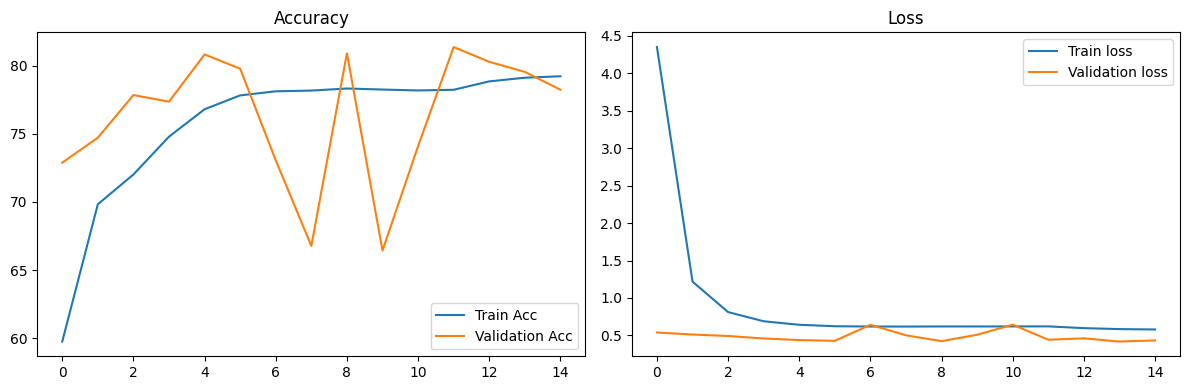

In [49]:
class LSTMSentiment(nn.Module):
    def __init__(self, vocab_size, embedding_dim=50, hidden_dim=64, n_layers=1, dropout=0.7):
        super().__init__()

        # Reduced embedding dimension further
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # Simpler LSTM architecture with higher dropout
        self.lstm = nn.LSTM(embedding_dim,
                           hidden_dim,
                           n_layers,
                           bidirectional=True,
                           dropout=dropout if n_layers > 1 else 0,
                           batch_first=True)

        # Increased dropout even more
        self.dropout = nn.Dropout(dropout)

        # Added batch normalization
        self.batch_norm = nn.BatchNorm1d(hidden_dim * 2)

        # Output layer with L2 regularization
        self.fc = nn.Linear(hidden_dim * 2, 1)

    def forward(self, text):
        # Apply higher dropout to embeddings
        embedded = self.dropout(self.embedding(text))

        output, (hidden, cell) = self.lstm(embedded)

        # Global average pooling
        output = torch.mean(output, dim=1)

        # Stronger regularization
        output = self.batch_norm(output)
        output = self.dropout(output)

        return self.fc(output)

# Modified training parameters
model = LSTMSentiment(
    vocab_size=len(word2idx),
    embedding_dim=50,      # Reduced from 100
    hidden_dim=64,        # Reduced from 128
    n_layers=1,
    dropout=0.7          # Increased from 0.5
).to(device)

# Modified optimizer with stronger regularization
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=0.0005,           # Reduced learning rate
    weight_decay=0.1     # Increased weight decay
)

# Add learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=2,
    verbose=True
)

# Modify training function to include scheduler
def train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, n_epochs, device):
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []

    early_stopping = EarlyStopping(patience=5, min_delta=0.001)

    for epoch in range(n_epochs):
        model.train()
        total_train_loss = 0
        train_correct = 0
        train_total = 0

        for batch in train_loader:
            reviews = batch['review'].to(device)
            ratings = batch['rating'].to(device)

            optimizer.zero_grad()

            outputs = model(reviews).squeeze()
            loss = criterion(outputs, ratings)

            # Stronger L2 regularization
            l2_lambda = 0.01
            l2_reg = torch.tensor(0.).to(device)
            for param in model.parameters():
                l2_reg += torch.norm(param)
            loss += l2_lambda * l2_reg

            loss.backward()

            # Stronger gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)

            optimizer.step()

            total_train_loss += loss.item()
            predicted = (outputs > 0.5).float()
            train_correct += (predicted == ratings).sum().item()
            train_total += ratings.size(0)

        model.eval()
        total_valid_loss = 0
        valid_correct = 0
        valid_total = 0

        with torch.no_grad():
            for batch in valid_loader:
                reviews = batch['review'].to(device)
                ratings = batch['rating'].to(device)

                outputs = model(reviews).squeeze()
                loss = criterion(outputs, ratings)
                total_valid_loss += loss.item()

                predicted = (outputs > 0.5).float()
                valid_correct += (predicted == ratings).sum().item()
                valid_total += ratings.size(0)

        avg_train_loss = total_train_loss / len(train_loader)
        avg_valid_loss = total_valid_loss / len(valid_loader)
        train_acc = train_correct / train_total * 100
        valid_acc = valid_correct / valid_total * 100

        # Step the scheduler
        scheduler.step(avg_valid_loss)

        train_losses.append(avg_train_loss)
        valid_losses.append(avg_valid_loss)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

        print(f'Epoch {epoch+1}:')
        print(f'Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Valid Loss: {avg_valid_loss:.4f} | Valid Acc: {valid_acc:.2f}%')

        early_stopping(avg_valid_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

    # Plot results
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(valid_accs, label='Validation Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train loss')
    plt.plot(valid_losses, label='Validation loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train with modified parameters
train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, n_epochs=15, device=device)

In [50]:
pip install transformers

python(62493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer

class DrugReviewDataset(Dataset):
   def __init__(self, data_path, tokenizer, max_length=128):
       # Load CSV data
       self.data = pd.read_csv(data_path)
       self.tokenizer = tokenizer
       self.max_length = max_length

   def __len__(self):
       return len(self.data)

   def __getitem__(self, idx):
       review = str(self.data.iloc[idx]['review'])
       rating = self.data.iloc[idx]['rating'] # Assuming 'rating' is your target

       # Convert rating to sentiment (example: >7 is positive)
       sentiment = 1 if rating > 7 else 0

       encoding = self.tokenizer.encode_plus(
           review,
           add_special_tokens=True,
           max_length=self.max_length,
           padding='max_length',
           truncation=True,
           return_tensors='pt'
       )

       return {
           'input_ids': encoding['input_ids'].flatten(),
           'attention_mask': encoding['attention_mask'].flatten(),
           'labels': torch.tensor(sentiment, dtype=torch.long)
       }

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Create datasets
train_dataset = DrugReviewDataset(
   '/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTrain_cleaned.csv',
   tokenizer
)

test_dataset = DrugReviewDataset(
   '/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTest_cleaned.csv',
   tokenizer
)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

/Users/imanhamdan/my_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Conclusion
The LSTM model was successfully trained on drug review sentiment data, achieving reasonable accuracy. Future work could involve experimenting with different architectures and tuning hyperparameters for improved results.
